In [13]:
import torch
from torch import nn, optim
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.datasets import make_swiss_roll
from sklearn.preprocessing import MinMaxScaler
from torchsummary import summary
from sklearn.model_selection import train_test_split

# Define Autoencoder

In [2]:
class Autoencoder(nn.Module):
    """Makes the main denoising auto

    Parameters
    ----------
    in_shape [int] : input shape
    enc_shape [int] : desired encoded shape
    """

    def __init__(self, in_shape, enc_shape):
        super(Autoencoder, self).__init__()
        
        self.encode = nn.Sequential(
            nn.Linear(in_shape, 128),
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Linear(64, enc_shape),
        )
        
        self.decode = nn.Sequential(
            nn.BatchNorm1d(enc_shape),
            nn.Linear(enc_shape, 64),
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Dropout(0.2),
            nn.Linear(128, in_shape)
        )
        
    def forward(self, x):
        x = self.encode(x)
        x = self.decode(x)
        return x

In [3]:
def train(model, error, optimizer, n_epochs, x):
    model.train()
    losses = []
    for epoch in range(1, n_epochs + 1):
        optimizer.zero_grad()
        output = model(x)
        loss = error(output, x)
        loss.backward()
        optimizer.step()
        losses.append(loss.detach().numpy())
        
        if epoch % int(0.1*n_epochs) == 0:
            print(f'epoch {epoch} \t Loss: {loss.item():.4g}')

# Prepare Data

In [5]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')
n_samples = 1500
X, colors = make_swiss_roll(n_samples)
X = MinMaxScaler().fit_transform(X)
x = torch.from_numpy(X).to(device)

# Train Model

In [6]:
model = Autoencoder(in_shape=3, enc_shape=2).double().to(device)
summary(model,(3,),dtypes=[torch.double])
error = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

train(model, error, optimizer, 5000, x)
torch.save(model.encode, "encoder.pt")
torch.save(model.decode, "decoder.pt")

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 2]                   --
|    └─Linear: 2-1                       [-1, 128]                 512
|    └─ReLU: 2-2                         [-1, 128]                 --
|    └─Dropout: 2-3                      [-1, 128]                 --
|    └─Linear: 2-4                       [-1, 64]                  8,256
|    └─ReLU: 2-5                         [-1, 64]                  --
|    └─Dropout: 2-6                      [-1, 64]                  --
|    └─Linear: 2-7                       [-1, 2]                   130
├─Sequential: 1-2                        [-1, 3]                   --
|    └─BatchNorm1d: 2-8                  [-1, 2]                   4
|    └─Linear: 2-9                       [-1, 64]                  192
|    └─ReLU: 2-10                        [-1, 64]                  --
|    └─Dropout: 2-11                     [-1, 64]                  --
|    └─Lin

# Load Model 

In [7]:
encoder = torch.load("encoder.pt")
decoder = torch.load("decoder.pt")

with torch.no_grad():
    encoded = encoder(x)
    decoded = decoder(encoded)
    mse = error(decoded, x).item()
    enc = encoded.cpu().detach().numpy()
    dec = decoded.cpu().detach().numpy()

# Visualization

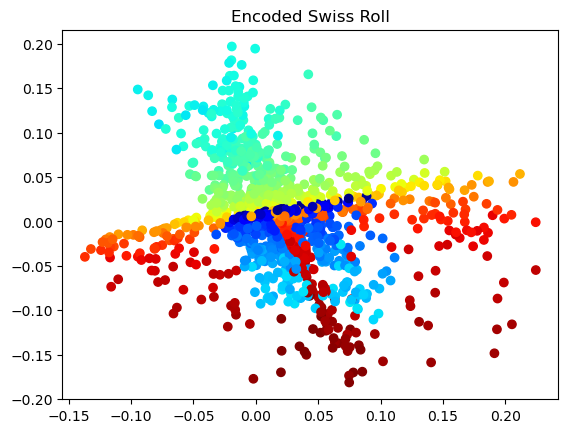

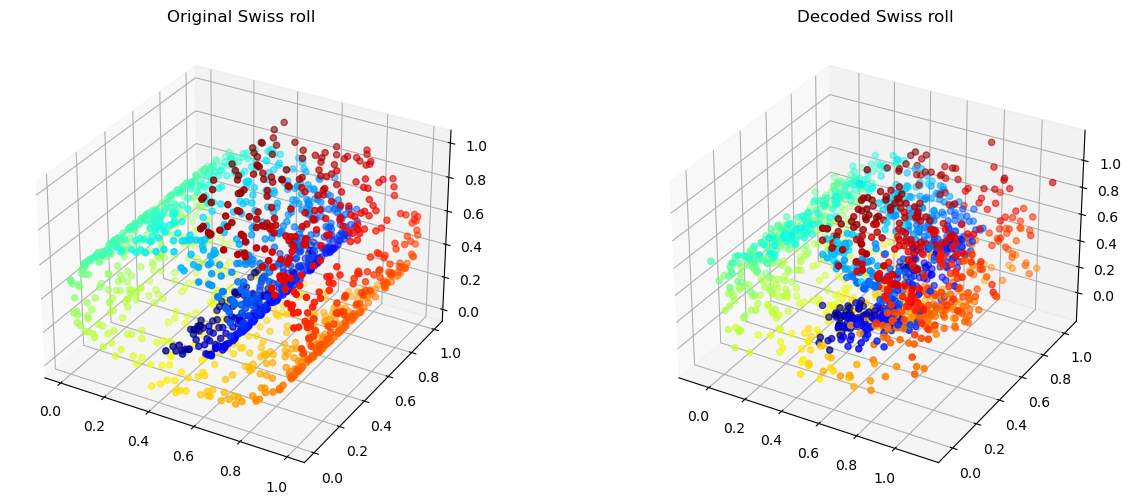

Root mean squared error: 0.07603


In [8]:
plt.scatter(enc[:, 0], enc[:, 1], c=colors, cmap=plt.cm.jet)
plt.title('Encoded Swiss Roll')
plt.show()

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=colors, cmap=plt.cm.jet)
plt.title('Original Swiss roll')
ax = fig.add_subplot(122, projection='3d')
ax.scatter(dec[:,0], dec[:,1], dec[:,2], c=colors, cmap=plt.cm.jet)
plt.title('Decoded Swiss roll')
plt.show()

print(f'Root mean squared error: {np.sqrt(mse):.4g}')

In [25]:
raw_data = pd.read_csv('/Users/jianpeng/Desktop/Sciml/data/diabetes.csv')
display(raw_data.head())
print(raw_data.Outcome.value_counts())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


0    500
1    268
Name: Outcome, dtype: int64


In [24]:
raw_data = torch.from_numpy(raw_data.to_numpy()).to(device)
print()

In [14]:
x_train, x_test, y_train, y_test = train_test_split(raw_data.drop('Outcome',axis=1), raw_data.Outcome, test_size=0.15, stratify=raw_data.Outcome)

In [15]:
x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)

In [19]:
positives = x_train[y_train == 1]
negatives = x_train[y_train == 0]

In [17]:
class Autoencoder(nn.Module):
    """Makes the main denoising auto

    Parameters
    ----------
    in_shape [int] : input shape
    enc_shape [int] : desired encoded shape
    """

    def __init__(self, in_shape, enc_shape):
        super(Autoencoder, self).__init__()
        
        self.encode = nn.Sequential(
            nn.Linear(in_shape, 100),
            nn.Tanh(True),
            nn.BatchNorm1d(100),
            nn.Linear(100, 75),
            nn.Tanh(True),
            nn.BatchNorm1d(75),
            nn.Linear(75, 50),
            nn.ReLU(True),
            nn.BatchNorm1d(50),
            nn.Linear(50, 25),
            nn.ReLU(True),
            nn.BatchNorm1d(25),
            nn.Linear(25, enc_shape),
            nn.ReLU(True),
        )
        
        self.decode = nn.Sequential(
            nn.Linear(enc_shape,25),
            nn.ReLU(True),
            nn.BatchNorm1d(25),
            nn.Linear(25,50),
            nn.ReLU(True),
            nn.BatchNorm1d(50),
            nn.Linear(50,75),
            nn.ReLU(True),
            nn.BatchNorm1d(75),
            nn.Linear(75,100),
            nn.Tanh(True),
            nn.BatchNorm1d(100),
            nn.Linear(100,in_shape),
            nn.Tanh(True)
        )

    def forward(self, x):
        x = self.encode(x)
        x = self.decode(x)
        return x

In [18]:
model = Autoencoder(in_shape=negatives.shape[1], enc_shape=7).double().to(device)
summary(model,(3,),dtypes=[torch.double])
error = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

train(model, error, optimizer, 5000, x_train)
torch.save(model.encode, "encoder.pt")
torch.save(model.decode, "decoder.pt")

[[0.17647059 0.40201005 0.71929825 ... 0.57575758 0.51836038 0.1       ]
 [0.05882353 0.90954774 0.68421053 ... 0.67340067 0.50384287 0.01666667]
 [0.23529412 0.6281407  0.70175439 ... 0.54377104 0.19555935 0.1       ]
 ...
 [0.35294118 0.67336683 0.70175439 ... 0.77777778 0.06831768 0.41666667]
 [0.58823529 0.50753769 0.75438596 ... 0.76767677 0.45175064 0.28333333]
 [0.70588235 0.75879397 0.61403509 ... 0.7037037  0.28351836 0.28333333]]


In [22]:
x_train = torch.from_numpy(X).to(device)

TypeError: 'int' object is not callable